In [ ]:
!pip install easyocr

In [ ]:
!pip install easyocr --quiet

import easyocr
print("EasyOCR imported successfully!")

EasyOCR imported successfully!


Saving clearformatword-result1.webp to clearformatword-result1 (1).webp
Loaded image: clearformatword-result1 (1).webp
Text: Lorem ipsum dolor sit amet, Confidence: 0.97
Text: groovyPost com, Confidence: 0.98
Text: consectetur adipiscing elit: Nam egestas sed dui id vehicula, Confidence: 0.89
Text: Duis condimentum sem quis risus, Confidence: 0.73
Text: scelerisque_, Confidence: 1.00
Text: rhoncus magna congue: Aliquam, Confidence: 0.88
Text: sapien enim, Phasellus venenatis massa eget, Confidence: 0.76
Text: interdum, Confidence: 0.71
Text: lementum, Confidence: 0.96
Text: Curabitur ac purus sem_, Confidence: 0.52
Text: Phasellus suscipit ut nunc, Confidence: 0.91
Text: gravida_, Confidence: 1.00
Text: Proin egestas tellus ipsum;, Confidence: 0.99
Text: efficitur, Confidence: 0.99
Text: ornare libero volutpat quis. Morbi posuere mollis auctor. Aliquam porta sem eu sapien viverra, Confidence: 0.75
Text: lobortis. Phasellus ac ligula imperdiet; aliquam mauris at; imperdiet augue_, Confi

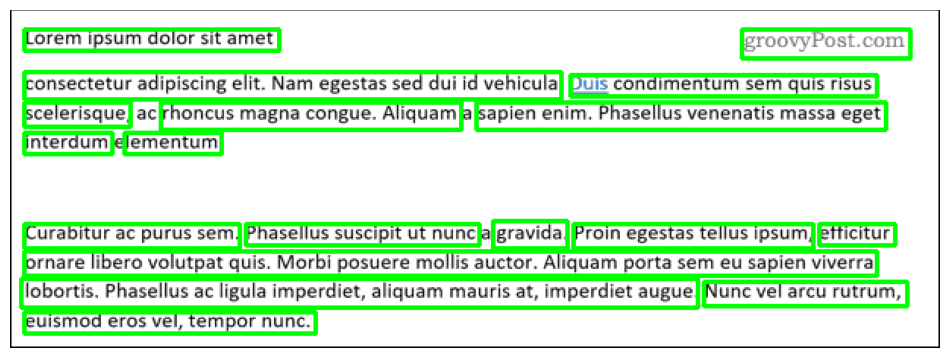

In [ ]:
# Step 1: Install dependencies


# Step 2: Upload your handwritten image
from google.colab import files
uploaded = files.upload()

# Step 3: Import libraries
import cv2
from matplotlib import pyplot as plt
import easyocr

# Step 4: Get the uploaded image filename (only works for one image at a time)
image_path = list(uploaded.keys())[0]
print(f"Loaded image: {image_path}")

# Step 5: Load the image with OpenCV
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image '{image_path}'. Please check the filename and upload again.")
else:
    # Convert image BGR to RGB (for display and EasyOCR input)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Step 6: Initialize EasyOCR Reader (use gpu=True if GPU available)
    reader = easyocr.Reader(['en'], gpu=True)

    # Step 7: Perform OCR on the image
    results = reader.readtext(image_rgb)

    # Step 8: Display results with bounding boxes
    for (bbox, text, prob) in results:
        print(f"Text: {text}, Confidence: {prob:.2f}")
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))
        cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)

    # Step 9: Show the image with bounding boxes
    plt.figure(figsize=(12,8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()